In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'width': 1024,
              'h#eight': 768,
              'theme' : 'serif',
              'transition': 'linear', #convex',
              'scroll': True,
              'start_slideshow_at': 'selected',       
})

{'h#eight': 768,
 'height': 768,
 'scroll': True,
 'start_slideshow_at': 'selected',
 'theme': 'serif',
 'transition': 'linear',
 'width': 1024}

# Aula 3:
 
- Método da Bissecção (continuação)
- Método do Ponto Fixo

#### Exercício sobre o método da Bissecção:

- Prove que $\cos(x)=x$ tem uma única solução em $\mathbb{R}$ e, por aplicação do método da bissecção, apresente uma aproximação dessa solução com um erro inferior a $10^{-7}$

In [1]:
#Provou-se que a única solução está em [0,1]
#Quantas iterações são necessárias para atingir o erro

from math import  cos, log
#Extremos iniciais do intervalo
A=0.0
B=1.0
TOLERRO=1.e-7

N=log(TOLERRO/(B-A))/log(1./2.)
print(N)
N=int(round(N+0.5,0))
print('N=',N) 



23.25349666421154
N= 24


In [2]:
# Definição da função f(x)
def f(x):
 return cos(x)-x

#Ciclo para calcular as aproximações
for i in range(1,N+1):
 p=(A+B)/2.0
 if (f(p)==0) : # era sorte a mais, Não serve de grande coisa !
  break        # Se não tivessemos o número de iterações  a  
 else:         #paragem seria com o  erro (discutir Pseudo-Código)
  if (f(A)*f(p)>0):
   A=p
  else:
   B=p

print('i=%d, p=%.7f' %(i, p))

quit()

i=24, p=0.7390851


### Como reaproveitar o código para outros casos?

- O método depende de:
 - função $f(x)$
 - Intervalo Inicial [A,B]
 - Condição de Paragem: erro e/ou número de iterações
 
 Vejamos um exemplo: criar um *módulo* : !Sair mode slideshow!

In [3]:
## Modulo bissect
## Condicao de paragem com erro=TOL ou Numero Maximo de iter. 
## Guardar sols num vector
import numpy as np

def bissect(f,A,B,TOL,NMAX):
    P=np.zeros((NMAX))
    ERRO= B-A
    i=0
    while  i < NMAX :
        P[i]=(A+B)/2.0
        print(f(P[i]))
        if f(P[i])==0 or ERRO<TOL: #Problemas com == 0 (discutir)
            print('iter=',i+1,'Aprox=',P[i])
            print('Erro=',ERRO)
            break
        else:
            if (f(A)*f(P[i])>0):
                A=P[i]
            else:
                B=P[i]
        print('iter=',i+1,'Aprox=',P[i])
        print('Erro=',ERRO)
        ERRO=(B-A)/2.0 #=(B-P[i])/2
        i+=1
    return P    

### noutro ficheiro
## import bissect
from math import cos

def f(x):
    return x**3+4*x**2-10

PSols=bissect(f,1.0,2.0,1e-17,13) #O ";" não mostra o output do iPython da função
print(PSols)

    


2.375
iter= 1 Aprox= 1.5
Erro= 1.0
-1.796875
iter= 2 Aprox= 1.25
Erro= 0.25
0.162109375
iter= 3 Aprox= 1.375
Erro= 0.125
-0.848388671875
iter= 4 Aprox= 1.3125
Erro= 0.0625
-0.350982666016
iter= 5 Aprox= 1.34375
Erro= 0.03125
-0.0964088439941
iter= 6 Aprox= 1.359375
Erro= 0.015625
0.0323557853699
iter= 7 Aprox= 1.3671875
Erro= 0.0078125
-0.0321499705315
iter= 8 Aprox= 1.36328125
Erro= 0.00390625
7.20247626305e-05
iter= 9 Aprox= 1.365234375
Erro= 0.001953125
-0.0160466907546
iter= 10 Aprox= 1.3642578125
Erro= 0.0009765625
-0.00798926281277
iter= 11 Aprox= 1.36474609375
Erro= 0.00048828125
-0.00395910152292
iter= 12 Aprox= 1.36499023438
Erro= 0.000244140625
-0.00194365901007
iter= 13 Aprox= 1.36511230469
Erro= 0.0001220703125
[ 1.5         1.25        1.375       1.3125      1.34375     1.359375
  1.3671875   1.36328125  1.36523438  1.36425781  1.36474609  1.36499023
  1.3651123 ]


### Exercício:

- A equação $f(x)= x^3+4x^2-10=0$ tem uma e uma só raiz  em $[1,2]$. Sabe-se que a solução exacta é dada por $p=1.365230013...$ (9 decimais exactos).
- Utilize 13 iterações do método da bissecção para aproximar o valor de $p$. Guarde o valor das aproximações em $p[i]$. 
- Calcule os majorantes dos erros em todas as iterações calculadas.
- Calcule os erros exactos em todas as iterações.
- Calcule $f(p[i]), (i=1\dots 13)$. Atente nos resultados obtidos e comente. 


## Método do ponto fixo. 

Consideremos $f$ contínua em $[a,b]$ tal que $f (a)f (b) < 0$, 
então a equação
$f (x)=0\Leftrightarrow$ $$\Leftrightarrow \underbrace{f(x)+x}_{g(x)}=x\Leftrightarrow$$ $$\Leftrightarrow g(x)=x$$
tem pelo menos uma solução em $[a,b]$.


- Encontrar um zero de $f(x)$ é equivalente a encontrar um ponto fixo de $g(x)$ ($g$ diz-se função iteradora) .

- Pode haver outras formas de transformar $f(x)=0$ em $g(x)=x$...

- Em que condições se consegue aproximar o ponto fixo de $g$ usando iterações da forma $x_{n+1} = g(x_n ), n = 0, 1, 2, . . .$ ?


### Algoritmo $x_{n+1}=g(x_n)$ 

#### Convergência Monótona, Alternada, Divergência

##### Convergência Monótona

- Exemplo: Determine uma aproximação de $x\in [0,2]$ tal que $f(x)=0$ com $f(x)=-e^{-x}-x+1.5.$

 - Função iteradora $g(x)=f(x)+x=-e^{-x}+1.5.$
 
 - Estude graficamente $g'(x)$...

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

def g(x):
    return -exp(-x)+1.5

N=10 # Numero de iterações

X=np.zeros(N)

#X[0]=0 aproximação inicial dada

for i in range(1,N):
    X[i]=g(X[i-1])


print(X)


[ 0.          0.5         0.89346934  1.09076648  1.16404111  1.1877781
  1.19510203  1.19732693  1.1979996   1.19820268]


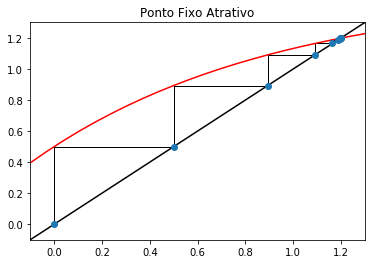

In [5]:
x=np.linspace(-0.5,2.1,40)
plt.plot(x,x,'-',color='k')

for i in range(0,N-1): 
    A=np.array([X[i],X[i]])
    B=np.array([X[i],g(X[i])])            
    plt.plot(A,B,'-',color='k',lw=1)
    B=np.array([X[i],g(X[i])])
    A=np.array([X[i+1],X[i+1]])
    plt.plot(B,A,'-',color='k',lw=1)
    
plt.title("Ponto Fixo Atrativo")     
plt.plot(x,-np.exp(-x)+1.5,'-',color='r')
plt.plot(X,X,'o')
plt.xlim(-0.1,1.3)
plt.ylim(-0.1,1.3)
plt.show()
quit()

##### Convergência Alternada

- Exemplo: Determine uma aproximação de $x\in [-1,1]$ tal que $f(x)=0$ com $f(x)=e^{-x}-x$

 - Função iteradora $g(x)=f(x)+x=e^{-x}$
 
 - Estude graficamente $g'(x)$...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

def g(x):
    return exp(-x)

N=10 # Numero de iterações

X=np.zeros(N)

#X[0]=0 aproximação inicial dada

for i in range(1,N):
    X[i]=g(X[i-1])


print('Sol X=',X,'\n')
print('|X[i]-X[i-1]|=',abs(X[1:N]-X[0:N-1]))

Sol X= [ 0.          1.          0.36787944  0.69220063  0.5004735   0.60624354
  0.54539579  0.57961234  0.56011546  0.57114312] 

|X[i]-X[i-1]|= [ 1.          0.63212056  0.32432119  0.19172713  0.10577003  0.06084775
  0.03421655  0.01949687  0.01102765]


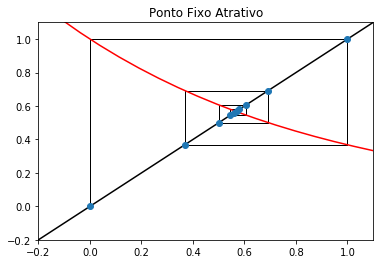

In [2]:
x=np.linspace(-1.1,1.1,30)
plt.plot(x,x,'-',color='k')

for i in range(0,N-1): 
    A=np.array([X[i],X[i]])
    B=np.array([X[i],g(X[i])])            
    plt.plot(A,B,'-',color='k',lw=1)
    B=np.array([X[i],g(X[i])])
    A=np.array([X[i+1],X[i+1]])
    plt.plot(B,A,'-',color='k',lw=1)
    
plt.title("Ponto Fixo Atrativo")     
plt.plot(x,np.exp(-x),'-',color='r')
plt.plot(X,X,'o')
plt.xlim(-0.2,1.1)
plt.ylim(-0.2,1.1)
plt.show()
quit()

##### Divergência

- Exemplo: Verifique que $3.7(1-x)x-x=0$ tem uma solução em $[0.5,1]$. 
 
 - Considere a função iteradora $g(x)=3.7(1-x)x$ e a aproximação inicial $x_0=0.8$.
 
 - Estude graficamente $g'(x)$...


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

def g(x):
    return 3.7*(1-x)*x

N=15 # Numero de iterações

X=np.zeros(N)

X[0]=0.8 #aproximação inicial dada

for i in range(1,N):
    X[i]=g(X[i-1])


print('Sol X=',X,'\n')
print('|X[i]-X[i-1]|=',abs(X[1:N]-X[0:N-1]))

Sol X= [ 0.8         0.592       0.8936832   0.35155009  0.84346171  0.488526
  0.92451288  0.2582186   0.70870449  0.76383701  0.66744311  0.82126237
  0.54312481  0.91811893  0.27815328] 

|X[i]-X[i-1]|= [ 0.208       0.3016832   0.54213311  0.49191162  0.35493571  0.43598689
  0.66629429  0.45048589  0.05513252  0.0963939   0.15381926  0.27813757
  0.37499412  0.63996565]


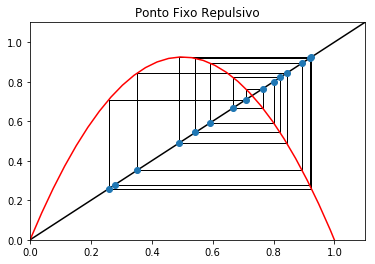

In [2]:
x=np.linspace(0.0,1.1,30)
plt.plot(x,x,'-',color='k')

for i in range(0,N-1): 
    A=np.array([X[i],X[i]])
    B=np.array([X[i],g(X[i])])            
    plt.plot(A,B,'-',color='k',lw=1)
    B=np.array([X[i],g(X[i])])
    A=np.array([X[i+1],X[i+1]])
    plt.plot(B,A,'-',color='k',lw=1)
    
plt.title("Ponto Fixo Repulsivo")     
plt.plot(x,g(x),'-',color='r')
plt.plot(X,X,'o')
plt.xlim(0.0,1.1)
plt.ylim(0.0,1.1)
plt.show()
quit()

##### Divergência/Convergência "ou nem por isso"

- Exemplo: Ponto Fixo Neutro 
 
 - Considere a função iteradora $g(x)=x-x^2$ com ponto fixo em $0$ e as aproximações iniciais $x_0=\pm 0.1$.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

def g(x):
    return x-x**2

N=40 # Numero de iterações

X=np.zeros(N)

X[0]=0.1 #aproximação inicial dada

for i in range(1,N):
    X[i]=g(X[i-1])


print('Sol X=',X,'\n')
print('|X[i]-X[i-1]|=',abs(X[1:N]-X[0:N-1]))

Sol X= [ 0.1         0.09        0.0819      0.07519239  0.06953849  0.06470289
  0.06051643  0.05685419  0.05362179  0.05074649  0.04817129  0.04585081
  0.04374852  0.04183458  0.04008445  0.03847769  0.03699716  0.03562837
  0.03435899  0.03317845  0.03207764  0.03104866  0.03008464  0.02917956
  0.02832811  0.02752563  0.02676797  0.02605144  0.02537277  0.02472899
  0.02411747  0.02353581  0.02298188  0.02245371  0.02194954  0.02146776
  0.0210069   0.02056561  0.02014266  0.01973694] 

|X[i]-X[i-1]|= [ 0.01        0.0081      0.00670761  0.0056539   0.0048356   0.00418646
  0.00366224  0.0032324   0.0028753   0.00257521  0.00232047  0.0021023
  0.00191393  0.00175013  0.00160676  0.00148053  0.00136879  0.00126938
  0.00118054  0.00110081  0.00102897  0.00096402  0.00090509  0.00085145
  0.00080248  0.00075766  0.00071652  0.00067868  0.00064378  0.00061152
  0.00058165  0.00055393  0.00052817  0.00050417  0.00048178  0.00046086
  0.00044129  0.00042294  0.00040573]


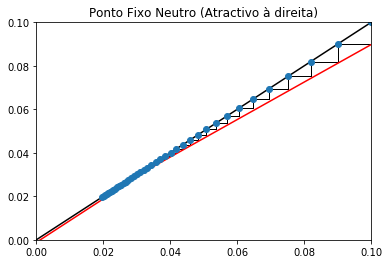

In [2]:
x=np.linspace(-1.0,1.0,30)
plt.plot(x,x,'-',color='k')

for i in range(0,N-1): 
    A=np.array([X[i],X[i]])
    B=np.array([X[i],g(X[i])])            
    plt.plot(A,B,'-',color='k',lw=1)
    B=np.array([X[i],g(X[i])])
    A=np.array([X[i+1],X[i+1]])
    plt.plot(B,A,'-',color='k',lw=1)
    
plt.title("Ponto Fixo Neutro (Atractivo à direita)")     
plt.plot(x,g(x),'-',color='r')
plt.plot(X,X,'o')
plt.xlim(0.0,0.1)
plt.ylim(0.0,0.1)
plt.show()
quit()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

def g(x):
    return x-x**2

N=20 # Numero de iterações

X=np.zeros(N)

X[0]=-0.1 #aproximação inicial dada

for i in range(1,N):
    X[i]=g(X[i-1])


print('Sol X=',X,'\n')
print('|X[i]-X[i-1]|=',abs(X[1:N]-X[0:N-1]))

Sol X= [ -1.00000000e-01  -1.10000000e-01  -1.22100000e-01  -1.37008410e-01
  -1.55779714e-01  -1.80047034e-01  -2.12463968e-01  -2.57604906e-01
  -3.23965194e-01  -4.28918640e-01  -6.12889840e-01  -9.88523797e-01
  -1.96570309e+00  -5.82969174e+00  -3.98149976e+01  -1.62504903e+03
  -2.64240940e+06  -6.98233006e+12  -4.87529330e+25  -2.37684848e+51] 

|X[i]-X[i-1]|= [  1.00000000e-02   1.21000000e-02   1.49084100e-02   1.87713044e-02
   2.42673194e-02   3.24169344e-02   4.51409378e-02   6.63602876e-02
   1.04953447e-01   1.83971200e-01   3.75633956e-01   9.77179297e-01
   3.86398865e+00   3.39853058e+01   1.58523403e+03   2.64078435e+06
   6.98232742e+12   4.87529330e+25   2.37684848e+51]


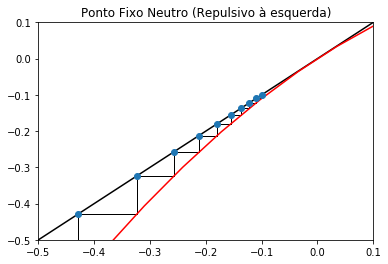

In [2]:
x=np.linspace(-1.0,1.0,30)
plt.plot(x,x,'-',color='k')

for i in range(0,N-1): 
    A=np.array([X[i],X[i]])
    B=np.array([X[i],g(X[i])])            
    plt.plot(A,B,'-',color='k',lw=1)
    B=np.array([X[i],g(X[i])])
    A=np.array([X[i+1],X[i+1]])
    plt.plot(B,A,'-',color='k',lw=1)
    
plt.title("Ponto Fixo Neutro (Repulsivo à esquerda)")     
plt.plot(x,g(x),'-',color='r')
plt.plot(X,X,'o')
plt.xlim(-0.5,0.1)
plt.ylim(-0.5,0.1)
plt.show()
quit()

#### Exercício:  Funções iteradoras diferentes $\rightarrow$ velocidades de convergência diferentes.

Sabe-se que a equação $x^3+4x^2-10=0$ tem uma e uma só solução em $[1,2]$.
Verifique que as funções iteradoras $g_i, i=1\dots 5$ tem como ponto fixo  a solução da equação anterior.

- $x=g_1(x)=x-x^3-4x^2+10$
- $x=g_2(x)=(\frac{10}{x}-4x)^{1/2}$
- $x=g_3(x)=0.5(10-x^3)^{1/2}$
- $x=g_4(x)=(\frac{10}{4+x})^{1/2}$
- $x=g_5(x)=x-\frac{x^3+4x^2-10}{3x^2+8x}$

- Use o método do ponto fixo com $p_0=1.5$ para tentar aproximar a solução do problema inicial usando cada um dos problemas do ponto fixo anteriores.

- Para os métodos (sempre que possível) quando $|x_{i+1}-x_i|<10^{-7}.$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

def g_1(x):
    return x-x**3-4*x**2+10

def g_2(x):
    return sqrt(10/x-4*x)

def g_3(x):
    return 0.5*sqrt(10-x**3)

def g_4(x):
    return sqrt(10.0/(4+x))
    
def g_5(x):
    return x-(x**3+4*x**2-10)/(3*x**2+8*x)

g=g_5


N=50 # Numero máximo de iterações


x=1.5 #aproximação inicial dada

TOL=1.e-9
DIVERGTOL= 1.e7 

erro = 1 # Erro inicial


for i in range(1,N):
    y=g(x)
    erro = abs(x-y)
    x=y
    print('x={x:.9f}, iter={i}'.format(x=x,i=i))
    if erro < TOL :
        print('Erro {erro:.10f} < TOL '.format(erro=erro))
        break
    elif erro >DIVERGTOL : 
        print('Erro {erro:.2f} > DIVERGTOL '.format(erro=erro))
        print('DIVERGE')
        break


x=1.373333333, iter=1
x=1.365262015, iter=2
x=1.365230014, iter=3
x=1.365230013, iter=4
Erro 0.0000000005 < TOL 
